# Experiment 10

This experiment investigates the convergence rates of $E_{\mu_n}[R(\hat q)]$ compared to
constant $R(q^\star)$, using constant $p=6$, using $\lambda = O(1/n)$.

It differs from experiment 9 by having $\lambda$ much lower ($\lambda=3$ instead of
$\lambda=150$), therefore we expect to have a higher out of sample movements.

This time, we should expect convergence $O(1/n)$.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cvxpy as cvx
from model.distrs import StudentTDistribution,DiscreteDistribution,NormalDistribution
from model.distrs import E,Var,Std
import model.synth_data as synth
import model.utility as ut
import model.problem as pr

from helper.stats import five_stats

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,4)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
plt.rc('font',serif='times')

In [4]:
p = 6
ns = np.arange(50,550,50)
n_true = 50000
n_experiments = 500
λ = 3
δ = 0.2

#Utility
β = 1
r_threshold = 60
u = ut.LinearPlateauUtility(β,r_threshold)

Rf = 0 

In [5]:
print(ns)

[ 50 100 150 200 250 300 350 400 450 500]


In [26]:
# True market
R_true = NormalDistribution(8,10)
X_true = [1/np.sqrt(2)*StudentTDistribution(ν=4) for _ in range(p)]
M_true = synth.GaussianMarket(X_true,R_true)

# Discretized market
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [27]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

In [28]:
R_star_q_star = p_star.insample_cost(q_star)
CE_star_q_star = p_star.insample_CE(q_star)

In [29]:
# Results placeholder
qs = np.zeros(shape=(len(ns),p+1,n_experiments))
CEs_ins = np.empty(shape=(len(ns),n_experiments))
CEs_oos = np.empty(shape=(len(ns),n_experiments))
Rs_ins = np.empty(shape=(len(ns),n_experiments))
Rs_oos = np.empty(shape=(len(ns),n_experiments))

In [30]:
# About 8minutes running time.
for i,n in enumerate(ns):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ/n,u,Rf)
    prs.sample(n_experiments)
    qs[i,:p+1,:] = prs.qs.T
    CEs_ins[i,:] = prs.CEs_ins
    CEs_oos[i,:] = prs.CEs_oos
    Rs_ins[i,:] = prs.Rs_ins
    Rs_oos[i,:] = prs.Rs_oos

Sampling 500 problems of size 50 × 7


Sampling 500 problems of size 100 × 7


Sampling 500 problems of size 150 × 7


Sampling 500 problems of size 200 × 7


Sampling 500 problems of size 250 × 7


Sampling 500 problems of size 300 × 7


Sampling 500 problems of size 350 × 7


Sampling 500 problems of size 400 × 7


Sampling 500 problems of size 450 × 7


Sampling 500 problems of size 500 × 7


Sampling 500 problems of size 550 × 7


Sampling 500 problems of size 600 × 7


Sampling 500 problems of size 650 × 7


Sampling 500 problems of size 700 × 7


Sampling 500 problems of size 750 × 7


Sampling 500 problems of size 800 × 7


Sampling 500 problems of size 850 × 7


Sampling 500 problems of size 900 × 7


Sampling 500 problems of size 950 × 7


Sampling 500 problems of size 1000 × 7


Sampling 500 problems of size 1050 × 7


Sampling 500 problems of size 1100 × 7


Sampling 500 problems of size 1150 × 7


Sampling 500 problems of size 1200 × 7


Sampling 500 problems of size 1250 × 7


Sampling 500 problems of size 1300 × 7


Sampling 500 problems of size 1350 × 7


Sampling 500 problems of size 1400 × 7


Sampling 500 problems of size 1450 × 7


Sampling 500 problems of size 1500 × 7


Sampling 500 problems of size 1550 × 7


Sampling 500 problems of size 1600 × 7


Sampling 500 problems of size 1650 × 7


Sampling 500 problems of size 1700 × 7


Sampling 500 problems of size 1750 × 7


Sampling 500 problems of size 1800 × 7


Sampling 500 problems of size 1850 × 7


Sampling 500 problems of size 1900 × 7


Sampling 500 problems of size 1950 × 7


Sampling 500 problems of size 2000 × 7


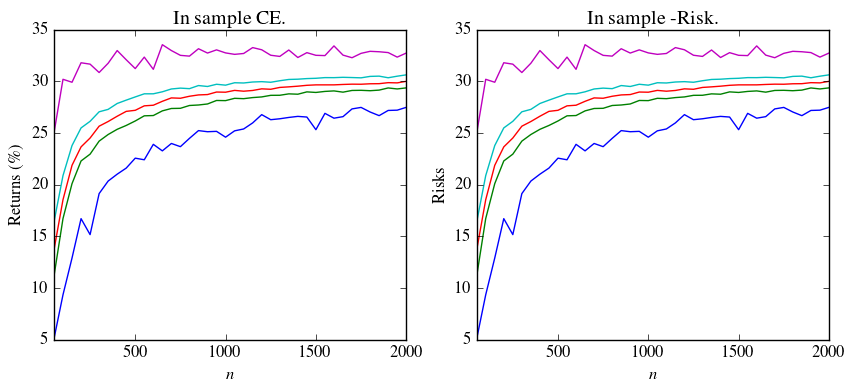

In [34]:
matplotlib.rcParams['figure.figsize'] = (10,4)
f,(p1,p2) = plt.subplots(1,2)
p1.plot(*five_stats(CEs_ins,ns))
p1.axis(xmin=50)
p1.set_xlabel('$n$')
p1.set_ylabel('Returns (\%)')
p1.set_title('In sample CE.');

p2.plot(*five_stats(-Rs_ins,ns))
p2.axis(xmin=50)
p2.set_xlabel('$n$')
p2.set_ylabel('Risks')
p2.set_title('In sample -Risk.');

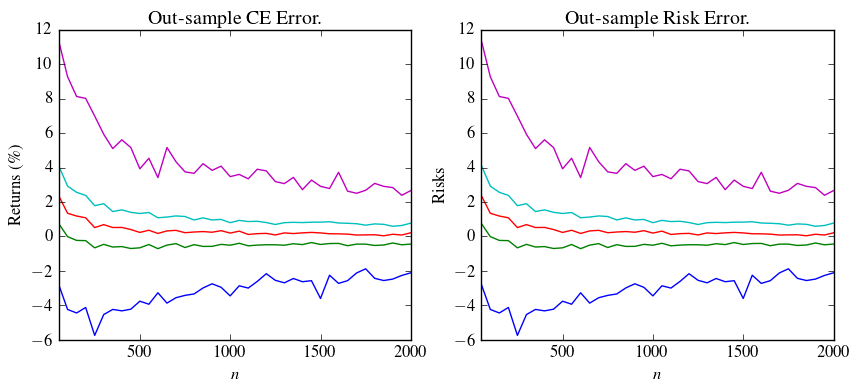

In [35]:
f,(p1,p2) = plt.subplots(1,2)
p1.plot(*five_stats(CEs_ins-CEs_oos,ns))
p1.axis(xmin=50)
p1.set_xlabel('$n$')
p1.set_ylabel('Returns (\%)')
p1.set_title('Out-sample CE Error.');

p2.plot(*five_stats(-Rs_ins+Rs_oos,ns))
p2.axis(xmin=50)
p2.set_xlabel('$n$')
p2.set_ylabel('Risks')
p2.set_title('Out-sample Risk Error.');

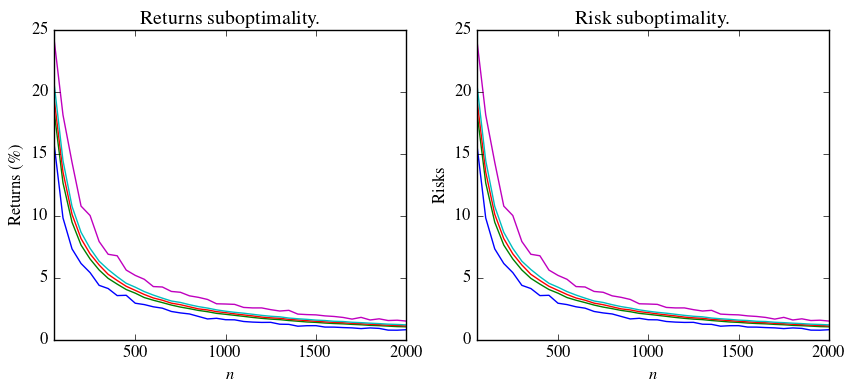

In [42]:
matplotlib.rcParams['figure.figsize'] = (10,4)
f,(p1,p2) = plt.subplots(1,2)
p1.plot(*five_stats(-CEs_oos+CE_star_q_star,ns))
p1.set_xlabel('$n$')
p1.set_ylabel('Returns (\%)')
p1.axis(xmin=50)
p1.set_title('Returns suboptimality.');

p2.plot(*five_stats(-R_star_q_star+Rs_oos,ns))
p2.set_xlabel('$n$')
p2.set_ylabel('Risks')
p2.axis(xmin=50)
p2.set_title('Risk suboptimality.');

(50, 2000.0, 0.0, 7.0)

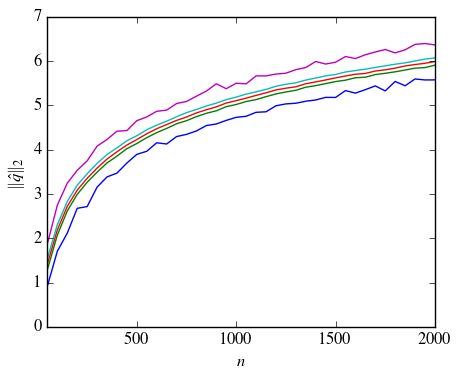

In [40]:
matplotlib.rcParams['figure.figsize'] = (5,4)
norm = np.linalg.norm
plt.plot(*five_stats(norm(qs,axis=1),ns))
plt.xlabel('$n$')
plt.ylabel('$\|\hat q\|_2$')
plt.axis(xmin=50)